In [80]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.compose import *
from sklearn.pipeline import *
from sklearn.tree import *
from sklearn.ensemble import *
from xgboost import *
from sklearn.svm import *
import pickle

In [81]:
def retrieve_columns(df,mode):
    num_columns = df.dtypes[df.dtypes!="object"].index.values
    cat_columns = df.dtypes[df.dtypes=="object"].index.values
    if mode[0:3].lower() == "cat":
        return cat_columns
    elif mode[0:3].lower() == "num":
        return num_columns

In [82]:
df = pd.read_csv("laptop_data.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [83]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [84]:
df.isna().sum().sum()

0

In [85]:
df.duplicated().sum()

29

In [86]:
print("Company :",df["Company"].unique())
print()
print("Company :",df["TypeName"].unique())
print()
print("Company :",(df["OpSys"].unique()))

Company : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']

Company : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']

Company : ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


In [87]:
df_1 = df.copy()

df_1["ScreenResolution"] = list(map(lambda x: x.lower(),df_1["ScreenResolution"]))
df_1["TouchScreen"] = list(map(lambda x: 1 if "touchscreen" in x else 0,df_1["ScreenResolution"]))
df_1["IPS"] = list(map(lambda x: 1 if "ips" in x else 0,df_1["ScreenResolution"]))

df_1["TouchScreen"] = df_1["TouchScreen"].astype("int64")
df_1["IPS"] = df_1["IPS"].astype("int64")

df_1.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,Apple,Ultrabook,13.3,ips panel retina display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0
2,HP,Notebook,15.6,full hd 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0
3,Apple,Ultrabook,15.4,ips panel retina display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1
4,Apple,Ultrabook,13.3,ips panel retina display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1


In [88]:
df_2 = df_1.copy()

df_2["ScreenResolution"] = list(map(lambda x: re.search("\d\d\d+x\d\d\d+",x).group(), df_1["ScreenResolution"]))
df_2["ScreenResolution"] = list(map(lambda x: tuple(x.split("x")),df_2["ScreenResolution"]))
df_2["ScreenLength"] = list(map(lambda x: x[0],df_2["ScreenResolution"]))
df_2["ScreenWidth"] = list(map(lambda x: x[1],df_2["ScreenResolution"]))

df_2["ScreenLength"] = df_2["ScreenLength"].astype("int64")
df_2["ScreenWidth"] = df_2["ScreenWidth"].astype("int64")

df_2.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ScreenLength,ScreenWidth
0,Apple,Ultrabook,13.3,"(2560, 1600)",Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,"(1440, 900)",Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,"(1920, 1080)",Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,"(2880, 1800)",Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,"(2560, 1600)",Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,2560,1600


<Axes: >

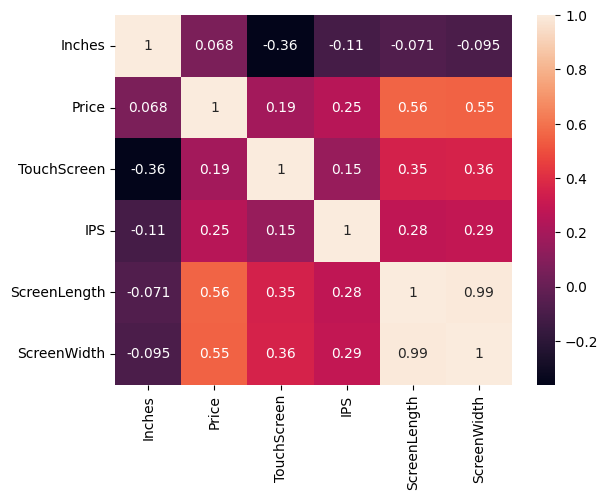

In [89]:
sns.heatmap(df_2[retrieve_columns(df_2,"numerical")].corr(),annot=True)

In [90]:
df_3 = df_2.copy()

df_3["PPI"] = np.sqrt(df_2["ScreenLength"]*df_2["ScreenLength"] + df_2["ScreenWidth"]*df_2["ScreenWidth"])/df_2["Inches"]
df_3.drop(["ScreenResolution","Inches","ScreenLength","ScreenWidth"],axis=1,inplace=True)

df_3.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005


In [91]:
df_4 = df_3.copy()

for i in df_4.index.values:
    x = df_4.loc[i,"Cpu"]
    x = x.lower()

    if "intel core" in x:
        y = x.split(" ")
        p = "Intel Core "+y[2]
        df_4.loc[i,"Cpu"] = p

    elif ("dual" in x) or ("quad" in x):
        y = x.split(" ")
        cr = ""
        p = y[0].capitalize() + " " + y[1].capitalize() + " " + y[2].capitalize() + " " + y[3].capitalize()
        df_4.loc[i,"Cpu"] = p

    elif "amd ryzen" in x:
        y = x.split(" ")
        p = "AMD Ryzen "+y[2].capitalize()
        df_4.loc[i,"Cpu"] = p
        
    elif "intel" in x:
        y = x.split(" ")
        p = "Intel "+y[1].capitalize()
        df_4.loc[i,"Cpu"] = p
    
    elif "amd" in x:
        y = x.split(" ")
        p = "AMD "+y[1].capitalize()
        df_4.loc[i,"Cpu"] = p
    
    elif "samsung cortex" in x:
        y = x.split(" ")
        p = "Samsung Cortex"
        df_4.loc[i,"Cpu"] = p
    
    elif "i n tel":
        df_4.loc[i,"Cpu"] = "Other"
    
    if "series" in df_4.loc[i,"Cpu"]:
        k = df_4.loc[i,"Cpu"].split("-")
        df_4.loc[i,"Cpu"] = k[0] + "-" + k[1].capitalize()

df_4.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005


In [92]:
df_4["Cpu"].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series', 'Intel Core i3',
       'Intel Core m', 'Intel Atom', 'AMD E-Series', 'AMD A6-Series',
       'Intel Celeron Dual Core', 'AMD Ryzen 1700',
       'Intel Pentium Quad Core', 'AMD Fx', 'Intel Xeon',
       'AMD A10-Series', 'AMD A8-Series', 'AMD A12-Series',
       'Intel Celeron Quad Core', 'AMD Ryzen 1600',
       'Intel Pentium Dual Core', 'AMD A4-Series', 'Samsung Cortex'],
      dtype=object)

In [93]:
df_4.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005


In [94]:
df_5 = df_4.copy()

df_5["Ram"] = list(map(lambda x: re.sub("gb","",x.lower()),df_4["Ram"]))
df_5["Ram"] = df_5["Ram"].astype("int64")

df_5.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005


In [95]:
df_6 = df_5.copy()


df_6["Memory"] = list(map(lambda x: x.split("+"),df_5["Memory"]))
df_6["Memory"] = list(map(lambda x: [i.strip().lower() for i in x],df_6["Memory"]))

df_6.head()


df_6["ssd"] = np.nan
df_6["hdd"] = np.nan
df_6["flash storage"] = np.nan

df_6.reset_index(drop=True,inplace=True)


for i in df_6.index.values:
    for j in df_6.loc[i,"Memory"]:
        p = j.split(" ")
        if len(p) > 2:
            p[1] = p[1] + " " + p[2]
            p.pop()
        df_6.loc[i,p[1]] = int(re.search("\d+",p[0]).group())
        h = re.search("\D+",p[0]).group()
        if h=="tb":
            df_6.loc[i,p[1]] = 1024 * df_6.loc[i,p[1]]
        # print(df_2.loc[i,p[1]],end=" ")
   #  print()

df_6.drop("Memory",axis=1,inplace=True)
df_6["ssd"] = df_6["ssd"].fillna(0)
df_6["hdd"] = df_6["hdd"].fillna(0)
df_6["flash storage"] = df_6["flash storage"].fillna(0)
df_6["hybrid"] = df_6["hybrid"].fillna(0)


df_6["ssd"] = df_6["ssd"].astype("int64")
df_6["hdd"] = df_6["hdd"].astype("int64")
df_6["flash storage"] = df_6["flash storage"].astype("int64")
df_6["hybrid"] = df_6["hybrid"].astype("int64")

<Axes: >

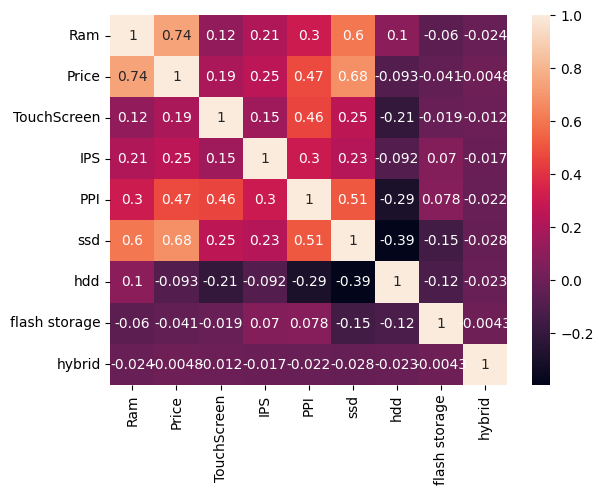

In [96]:
sns.heatmap(df_6[retrieve_columns(df_6,"numerical")].corr(),annot=True)

In [97]:
df_7 = df_6.drop(["flash storage","hybrid"],axis=1)
df_7.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,ssd,hdd
0,Apple,Ultrabook,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,128,0
1,Apple,Ultrabook,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,0,0
2,HP,Notebook,Intel Core i5,8,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,256,0
3,Apple,Ultrabook,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624,512,0
4,Apple,Ultrabook,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005,256,0


In [98]:
df_8 = df_7.copy()

df_8["Gpu"] = list(map(lambda x: x.split(" ")[0],df_8["Gpu"]))
df_8["Weight"] = list(map(lambda x: float(x[0:len(x)-2].strip()),df_8["Weight"]))
df_8["Weight"] = df_8["Weight"].astype("float64")

df_8.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,ssd,hdd
0,Apple,Ultrabook,Intel Core i5,8,Intel,macOS,1.37,71378.6832,0,1,226.983005,128,0
1,Apple,Ultrabook,Intel Core i5,8,Intel,macOS,1.34,47895.5232,0,0,127.677940,0,0
2,HP,Notebook,Intel Core i5,8,Intel,No OS,1.86,30636.0000,0,0,141.211998,256,0
3,Apple,Ultrabook,Intel Core i7,16,AMD,macOS,1.83,135195.3360,0,1,220.534624,512,0
4,Apple,Ultrabook,Intel Core i5,8,Intel,macOS,1.37,96095.8080,0,1,226.983005,256,0


In [99]:
df_9 = df_8.copy()

df_9["OpSys"][df_9["OpSys"]=="Mac OS X"] = "macOS"
df_9["OpSys"][df_9["OpSys"]=="Windows 10 S"] = "Windows 10"

df_9["OpSys"] = list(map(lambda x:"Mac" if x=="macOS" else "Windows" if "Windows" in x else x,df_9["OpSys"]))

df_9.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,ssd,hdd
0,Apple,Ultrabook,Intel Core i5,8,Intel,Mac,1.37,71378.6832,0,1,226.983005,128,0
1,Apple,Ultrabook,Intel Core i5,8,Intel,Mac,1.34,47895.5232,0,0,127.677940,0,0
2,HP,Notebook,Intel Core i5,8,Intel,No OS,1.86,30636.0000,0,0,141.211998,256,0
3,Apple,Ultrabook,Intel Core i7,16,AMD,Mac,1.83,135195.3360,0,1,220.534624,512,0
4,Apple,Ultrabook,Intel Core i5,8,Intel,Mac,1.37,96095.8080,0,1,226.983005,256,0


In [100]:
df_9["OpSys"].unique()

array(['Mac', 'No OS', 'Windows', 'Linux', 'Android', 'Chrome OS'],
      dtype=object)

In [101]:
df_10 = df_9.copy()

# le = LabelEncoder()

# df_10["Company"] = le.fit_transform(df_10["Company"])
# df_10["TypeName"] = le.fit_transform(df_10["TypeName"])

# df_10["Gpu"] = le.fit_transform(df_10["Gpu"])
# df_10["OpSys"] = le.fit_transform(df_10["OpSys"])

# df_10["Cpu"] = le.fit_transform(df_10["Cpu"])

# df_10["Price"] = df_10["Price"].round(2)

# df_10.head()

In [102]:
df_11 = df_10.copy()
df_11.drop_duplicates(inplace=True)
df_11["Price"] = df_11["Price"].astype("float64")
df_11.reset_index(drop=True,inplace=True)

In [103]:
X = df_11.drop("Price",axis=1)
y = df_11["Price"]

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=np.random.randint(0,1000))

In [111]:
X_train.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,TouchScreen,IPS,PPI,ssd,hdd
1128,HP,Gaming,Intel Core i5,8,Nvidia,Windows,3.35,0,1,127.335675,128,1024
292,HP,Notebook,Intel Core i3,8,Intel,Windows,2.54,0,0,106.113062,0,1024
892,Samsung,Ultrabook,Intel Core i7,8,Intel,Windows,1.17,0,0,146.860478,256,0
304,Asus,Gaming,Intel Core i7,8,Nvidia,Windows,2.50,0,0,141.211998,128,1024
241,Asus,Notebook,Intel Core i7,8,Nvidia,Windows,2.10,0,0,127.335675,128,1024


In [112]:
np.sort(X_train["hdd"].unique())

array([   0,    1,  128,  500, 1024, 2048], dtype=int64)

In [113]:
retrieve_columns(X,"categorical")

array(['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys'], dtype=object)

In [114]:
X_test

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,TouchScreen,IPS,PPI,ssd,hdd
830,Razer,Gaming,Intel Core i7,32,Nvidia,Windows,3.490,1,0,254.671349,512,0
580,Mediacom,Notebook,Intel Celeron Quad Core,4,Intel,Windows,1.450,0,1,157.350512,32,0
625,Lenovo,Notebook,Intel Core i7,8,Nvidia,Windows,2.200,0,0,141.211998,0,1024
131,Dell,Notebook,Intel Core i3,4,AMD,Windows,2.200,0,0,141.211998,0,1024
820,Lenovo,Notebook,Intel Core i3,4,Intel,Windows,2.100,0,0,100.454670,0,500
...,...,...,...,...,...,...,...,...,...,...,...,...
455,Dell,2 in 1 Convertible,Intel Pentium Quad Core,4,Intel,Windows,1.470,1,0,135.094211,0,500
1167,HP,Notebook,Intel Celeron Dual Core,2,Intel,Windows,1.440,0,0,111.935204,0,0
721,HP,2 in 1 Convertible,Intel Core i5,8,Intel,Windows,1.580,1,1,117.826530,256,0
1184,Asus,Gaming,Intel Core i7,8,Nvidia,Windows,2.591,0,1,141.211998,256,1024


In [117]:
X_train.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,TouchScreen,IPS,PPI,ssd,hdd
1128,HP,Gaming,Intel Core i5,8,Nvidia,Windows,3.35,0,1,127.335675,128,1024
292,HP,Notebook,Intel Core i3,8,Intel,Windows,2.54,0,0,106.113062,0,1024
892,Samsung,Ultrabook,Intel Core i7,8,Intel,Windows,1.17,0,0,146.860478,256,0
304,Asus,Gaming,Intel Core i7,8,Nvidia,Windows,2.50,0,0,141.211998,128,1024
241,Asus,Notebook,Intel Core i7,8,Nvidia,Windows,2.10,0,0,127.335675,128,1024


In [118]:
ct = ColumnTransformer(transformers=[("transform",OneHotEncoder(drop="first"),retrieve_columns(X,"categorical").tolist())],remainder="passthrough")


lr = LinearRegression()


pipe_lr = Pipeline([("step1",ct),("step2",lr)])

pipe_lr.fit(X_train,y_train)

y_pred = pipe_lr.predict(X_test)

rms_lr = root_mean_squared_error(y_test,y_pred)
r2_lr = r2_score(y_test,y_pred)

print(rms_lr)
print(r2_lr)

17558.954260908653
0.8173419214865447


In [119]:
oo1 = OneHotEncoder(drop="first")
oo2 = pd.DataFrame(oo1.fit_transform(X_train[retrieve_columns(X,"categorical").tolist()]).toarray())
oo2.columns = oo1.get_feature_names_out()
oo2[retrieve_columns(X,"numerical").tolist()] = X_train[retrieve_columns(X,"numerical").tolist()]
oo2.head()

,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,...,OpSys_Mac,OpSys_No OS,OpSys_Windows,Ram,Weight,TouchScreen,IPS,PPI,ssd,hdd
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,8.0,1.37,0.0,1.0,226.983005,128.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,8.0,1.34,0.0,0.0,127.677940,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,16.0,1.83,0.0,1.0,220.534624,512.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,8.0,1.37,0.0,1.0,226.983005,256.0,0.0


In [120]:
ct = ColumnTransformer(transformers=[("transform",OneHotEncoder(drop="first"),retrieve_columns(X,"categorical").tolist())],remainder="passthrough")

ridge = Ridge()


pipe_ridge = Pipeline([("step1",ct),("step2",ridge)])

pipe_ridge.fit(X_train,y_train)

y_pred = pipe_ridge.predict(X_test)

rms_ridge = root_mean_squared_error(y_test,y_pred)
r2_ridge = r2_score(y_test,y_pred)

print(rms_ridge)
print(r2_ridge)

18935.778709818256
0.7875738740349459


In [121]:
ct = ColumnTransformer(transformers=[("transform",OneHotEncoder(drop="first"),retrieve_columns(X,"categorical").tolist())],remainder="passthrough")

lasso = Lasso()


pipe_lasso = Pipeline([("step1",ct),("step2",lasso)])

pipe_lasso.fit(X_train,y_train)

y_pred = pipe_lasso.predict(X_test)

rms_lasso = root_mean_squared_error(y_test,y_pred)
r2_lasso = r2_score(y_test,y_pred)

print(rms_lasso)
print(r2_lasso)

17591.38205248888
0.816666634396078


In [122]:
ct = ColumnTransformer(transformers=[("transform",OneHotEncoder(drop="first"),retrieve_columns(X,"categorical").tolist())],remainder="passthrough")

dtr = DecisionTreeRegressor()


pipe_dtr = Pipeline([("step1",ct),("step2",dtr)])

pipe_dtr.fit(X_train,y_train)

y_pred = pipe_dtr.predict(X_test)

rms_dtr = root_mean_squared_error(y_test,y_pred)
r2_dtr = r2_score(y_test,y_pred)

print(rms_dtr)
print(r2_dtr)

19787.979368581844
0.7680232351749668


In [123]:
ct = ColumnTransformer(transformers=[("transform",OneHotEncoder(drop="first"),retrieve_columns(X,"categorical").tolist())],remainder="passthrough")

rfr = RandomForestRegressor()


pipe_rfr = Pipeline([("step1",ct),("step2",rfr)])

pipe_rfr.fit(X_train,y_train)

y_pred = pipe_rfr.predict(X_test)

rms_rfr = root_mean_squared_error(y_test,y_pred)
r2_rfr = r2_score(y_test,y_pred)

print(rms_rfr)
print(r2_rfr)

15694.80974231961
0.8540669361757974


In [124]:
maximum = max(r2_dtr,r2_lasso,r2_lr,r2_ridge,r2_rfr)
best_regressor = "Linear Regression" if r2_lr == maximum else "Lasso Regression" if r2_lasso == maximum else "Ridge Regression" if r2_ridge == maximum else "Decision Tree Regression" if r2_dtr == maximum else "Random Forest Regression"
best_model = lr if r2_lr == maximum else lasso if r2_lasso == maximum else ridge if r2_ridge == maximum else dtr if r2_dtr == maximum else rfr

In [125]:
best_model

RandomForestRegressor()

In [126]:
parameter_change = {
    "n_estimators" : [200,300,400],
    "criterion" : ["squared_error", "friedman_mse", "poisson"],
    "max_depth" : [50,100,150],
    "min_samples_split" : [2,3,4]
}

In [127]:
ct = ColumnTransformer(transformers=[("transform",OneHotEncoder(drop="first"),retrieve_columns(X,"categorical").tolist())],remainder="passthrough")
grid = GridSearchCV(estimator=best_model,param_grid=parameter_change,cv=3,n_jobs=-1,verbose=3)

pipe_grid = Pipeline([("step_1",ct),("step_2",grid)])
pipe_grid.fit(X_train,y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


Pipeline(steps=[('step_1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('transform',
                                                  OneHotEncoder(drop='first'),
                                                  ['Company', 'TypeName', 'Cpu',
                                                   'Gpu', 'OpSys'])])),
                ('step_2',
                 GridSearchCV(cv=3, estimator=RandomForestRegressor(),
                              n_jobs=-1,
                              param_grid={'criterion': ['squared_error',
                                                        'friedman_mse',
                                                        'poisson'],
                                          'max_depth': [50, 100, 150],
                                          'min_samples_split': [2, 3, 4],
                                          'n_estimators': [200, 300, 400]},
                              verbose=3))])

In [128]:
y_pred = pipe_grid.predict(X_test)
r2_pipe = r2_score(y_test,y_pred)
r2_pipe

0.8418598843123124

In [129]:
r2_pipe >= r2_rfr

False

In [130]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 50,
 'min_samples_split': 4,
 'n_estimators': 200}

In [131]:
grid.best_score_

0.7683954190819575

In [132]:
with open("model.pkl","wb") as fi:
    pickle.dump(obj=best_model,file=fi)